# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Visualization

Quanto a aceleração afeta o tempo de impacto?

In [3]:
#data = pd.read_csv('data.csv', delimiter='\t', header=35)
#df_novo = data.to_csv('data2.csv', index=False)
df = pd.read_csv('data2.csv')
df

,times,accel,strata,v
0,2.4,0.0,1,3.7
1,2.6,-1.3,1,3.7
2,3.2,-2.7,1,3.7
3,3.6,0.0,1,3.7
4,4.0,-2.7,1,3.7
...,...,...,...,...
89,52.0,10.7,3,138.0
90,53.2,-14.7,3,138.0
91,55.0,-2.7,3,138.0
92,55.4,-2.7,3,138.0


In [431]:
df.isna().sum()

times     0
accel     0
strata    0
v         0
dtype: int64

In [432]:
df.dtypes

times     float64
accel     float64
strata      int64
v         float64
dtype: object

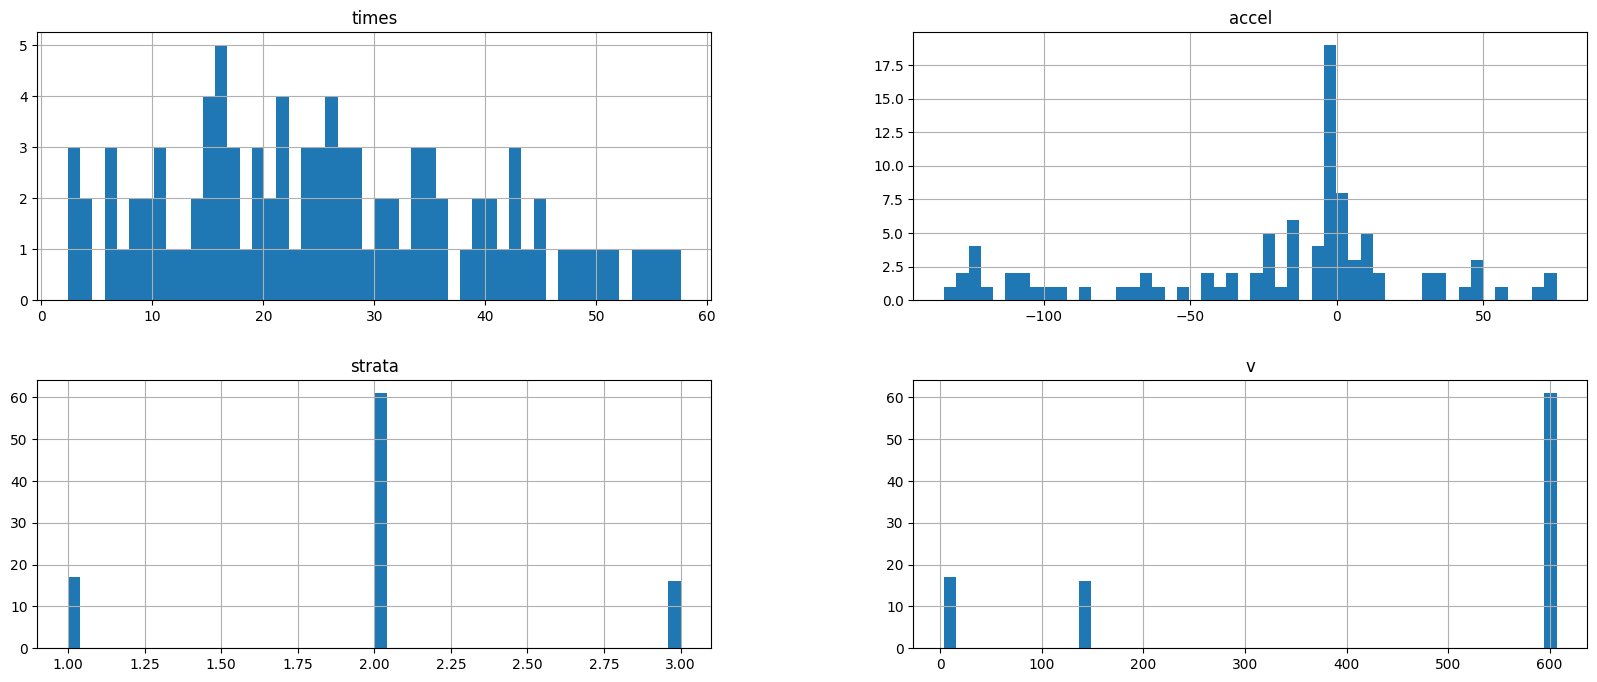

In [433]:
df[['times', 'accel',
       'strata', 'v']].hist(figsize=(20,8), bins=50)

plt.savefig('histograma.png')

# Regressão e SVR

Erro Quadrático Médio (MSE): 2380.274508276652
Raiz do Erro Quadrático Médio (RMSE): 48.7880570250205
Erro Médio Absoluto (MAE): 38.71527955926051
Coeficiente de Determinação (R²): 0.0598004290634776


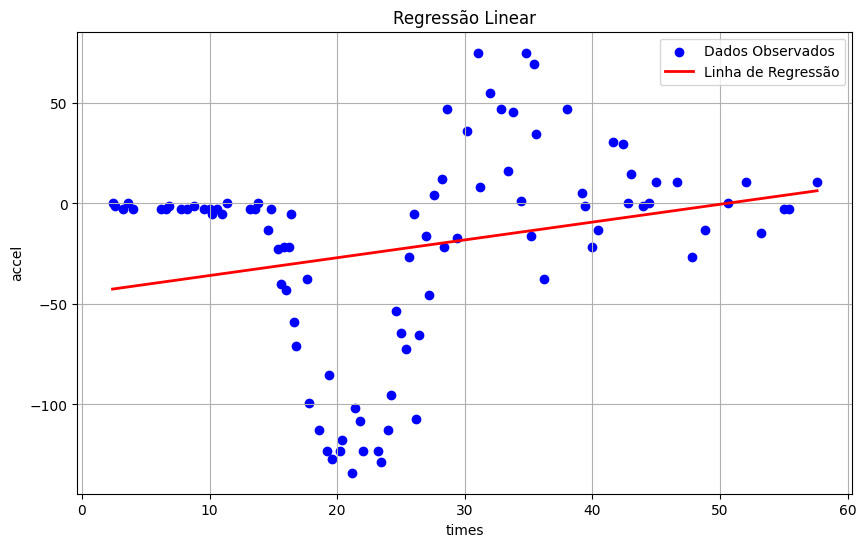

In [434]:
import pickle
#regressão linear simples
Xs = df[['times']]
ys = df['accel']

regression_model = LinearRegression()

regression_model.fit(Xs, ys)

y_preds = regression_model.predict(Xs)

mses = mean_squared_error(ys, y_preds)
rmses = mean_squared_error(ys, y_preds, squared=False)
maes = mean_absolute_error(ys, y_preds)
r2s = r2_score(ys, y_preds)

print(f"Erro Quadrático Médio (MSE): {mses}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmses}")
print(f"Erro Médio Absoluto (MAE): {maes}")
print(f"Coeficiente de Determinação (R²): {r2s}")

plt.figure(figsize=(10, 6))
plt.scatter(Xs, ys, color='blue', label='Dados Observados')
plt.plot(Xs, y_preds, color='red', linewidth=2, label='Linha de Regressão')
plt.xlabel('times')
plt.ylabel('accel')
plt.legend()
plt.grid(True)
plt.title('Regressão Linear')
plt.savefig('motor_simples_linear_regression_plot.png')

plt.show()

metrics = {
    "MSE": mses,
    "RMSE": rmses,
    "MAE": maes,
    "R²": r2s
}

with open('metrics_regressionlinearsimples.pkl', 'wb') as arquivo:
    pickle.dump(metrics, arquivo)

                            OLS Regression Results                            
Dep. Variable:                  accel   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     9.479
Date:                Thu, 19 Oct 2023   Prob (F-statistic):           0.000182
Time:                        14:56:50   Log-Likelihood:                -492.81
No. Observations:                  94   AIC:                             991.6
Df Residuals:                      91   BIC:                             999.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.8025     12.386     -1.599      0.1

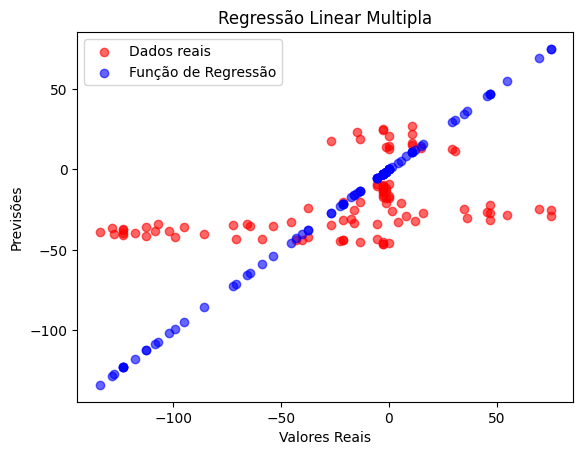

In [435]:
Xm = df[['times', 'v']]
y = df['accel']

# Adicionando a constante para o termo de interceptação
Xrm = sm.add_constant(Xm)

model = sm.OLS(y, Xrm).fit()

print(model.summary())

# Coeficientes da regressão
print("Coeficientes da regressão:")
print("Intercepto:", model.params['const'])
print("Coeficiente de 'times':", model.params['times'])
print("Coeficiente de 'v':", model.params['v'])

# Coeficientes da função de regressão
intercept = model.params['const']
coef_times = model.params['times']
coef_v = model.params['v']


# Criando um array de valores x_range para a linha da função
x_range = np.linspace(y.min(), y.max(), 100)
y_range = intercept + coef_times * df['times'] + coef_v * df['v']

plt.scatter(df['accel'], y_range, c='red', label='Dados reais', alpha=0.6)
plt.scatter(df['accel'], df['accel'], c='blue', label='Função de Regressão', alpha=0.6)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.legend()
plt.title('Regressão Linear Multipla')
plt.savefig('motor_multipla_linear_regression_plot.png')

# Coeficientes da regressão
print("Coeficientes da regressão:")
print("Intercepto:", intercept)
print("Coeficiente de 'times':", coef_times)
print("Coeficiente de 'v':", coef_v)
equation = f'y = {intercept:.2f} + {coef_times:.2f} * times + {coef_v:.2f} * v'
print("Equação da Reta de Regressão:")
print(equation)


plt.show()

Erro Quadrático Médio (MSE): 573.7106310553542
Raiz do Erro Quadrático Médio (RMSE): 23.952257326927544
Erro Médio Absoluto (MAE): 17.031011461208987
Coeficiente de Determinação (R²): 0.7733864361928156


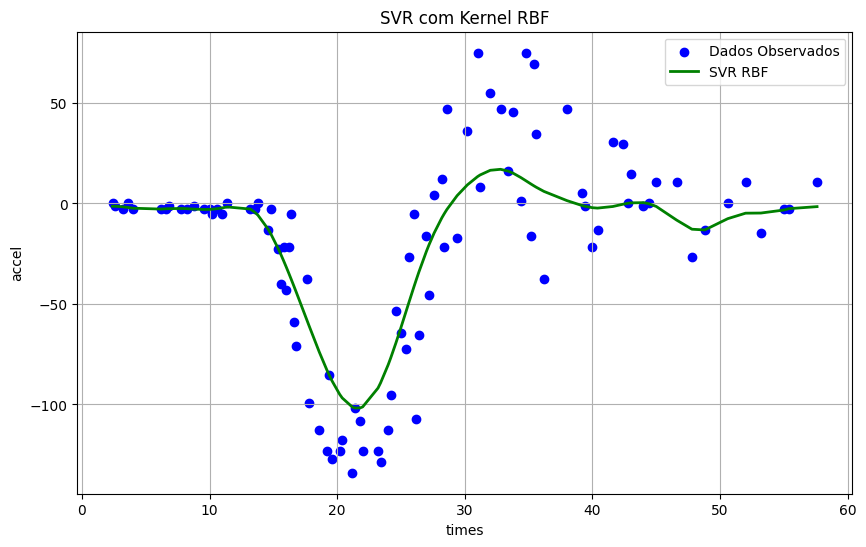

In [436]:

'''param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
    'gamma': ['scale', 'auto', 0.1, 1]
}'''

svr = SVR()
svr_model = SVR(C=10, kernel='rbf', epsilon=0.1, gamma=0.1)

svr_model.fit(Xs, ys)
y_preds_svr = svr_model.predict(Xs)

mses = mean_squared_error(ys, y_preds_svr)
rmses = np.sqrt(mses)
maes = mean_absolute_error(ys, y_preds_svr)
r2s = r2_score(ys, y_preds_svr)

print(f"Erro Quadrático Médio (MSE): {mses}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmses}")
print(f"Erro Médio Absoluto (MAE): {maes}")
print(f"Coeficiente de Determinação (R²): {r2s}")

plt.figure(figsize=(10, 6))
plt.scatter(Xs, ys, color='blue', label='Dados Observados')
plt.plot(Xs, y_preds_svr, color='green', linewidth=2, label='SVR RBF')
plt.xlabel('times')
plt.ylabel('accel')
plt.title('SVR com Kernel RBF')
plt.legend()
plt.grid(True)
plt.savefig('motorSVR_RBF_plot.png')
plt.show()

metrics = {
    "MSE": mses,
    "RMSE": rmses,
    "MAE": maes,
    "R²": r2s
}

with open('SVR_RBF.pkl', 'wb') as arquivo:
    pickle.dump(metrics, arquivo)